## GAIA catalog WFS ra,dec

Getting ra,dec of the four corner sensors with relation to the center of ComCam if boresight is (ra,dec)=(0,0)

In [22]:
from lsst.ts.phosim.SkySim import SkySim
import numpy as np 
from astropy.table import Table
from astropy.table import  hstack
from astropy.table import  vstack
import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



Note: in all of the below, we assume the following:

In [27]:
mjd = 57648  # arbitrary observation date 
raInDeg = 0 # boresight in degrees 
declInDeg = 0
rotSkyPos = 0 # rotation angle in degrees 
starMag = 15 # star magnitude 

First, plot the center of each half-sensor to show their orientation:

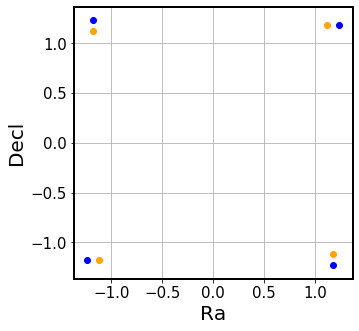

In [30]:
# Declare the SkySim()
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)

sensorName = ["R44_S00_C0", "R00_S22_C0",
              "R40_S02_C0", "R04_S20_C0",
              "R44_S00_C1", "R00_S22_C1",
              "R40_S02_C1", "R04_S20_C1"
             ]

# should be ~ the center of each sensor ..
# which are ~2000x4000
xPx = np.ones(len(sensorName))*1000 
yPx = np.ones(len(yPx))*2000


store_x = []
store_y = []
store_sensorName = [] 

i = 0 
for sensor in sensorName:
    #for ii in range(len(sensorName)):
    starId = i
    skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
    store_x.append(xPx[i])
    store_y.append(yPx[i])
    store_sensorName.append(sensor)
    
    i += 1 

        
ra,dec = skySim.getRaDecInDeg()

# store in astropy Table 
coords = Table(data=[ra,dec, store_x, store_y, store_sensorName ],
              names=['ra','dec', 'xPx', 'yPx', 'sensorName'])

%matplotlib inline

m = coords['ra']>180
coords['ra'][m]  = coords['ra'][m]-360

fig,ax  = plt.subplots(1,1,figsize=(5,5))
for part,color in zip(['C0','C1'], ['blue','orange']):
    m = [s.endswith(part) for s in coords['sensorName']]
    ax.scatter(coords['ra'][m], coords['dec'][m],c=color)
ax.set_xlabel('Ra')
ax.set_ylabel('Decl')
ax.grid()

In the above, blue are `C0`, i.e. intra-focal part of WFS, and orange are `C1` - the extra-focal part. 

We also plot more complex shapes to fully illustrate their orientation. For instance,  we plot arrows / outlines for each corner sensor : 

In [32]:
# Two convenience functions to define x,y coordinates of points
# that look like an arrow, and points that 
# trace the outline of the sensor 

def pixel_arrow(x_vertex=1500, y_vertex=3000, width=1100, 
                spacing=300, diag_spacing=200, xmin=0, xmax=2000,
                ymin=0, ymax=4072 , xy_offset = 1300 
               ):
    #x_vertex, y_vertex = 1500,3000  
    # width = 1100; spacing = 300
    xPx = np.zeros(0)
    yPx = np.zeros(0)
    # vertical part
    ys = np.arange(y_vertex-width,y_vertex, spacing )
    xs = x_vertex*np.ones_like(ys)
    print(xs,ys)
    xPx = np.append(xPx, xs)
    yPx = np.append(yPx, ys)


    # horizontal part 
    xh = np.arange(x_vertex-width,x_vertex, spacing)
    yh = y_vertex*np.ones_like(xh)
    print(xh, yh)
    xPx = np.append(xPx, xh)
    yPx = np.append(yPx, yh)


    # diagonal part:
    x_start, y_start = x_vertex-xy_offset, y_vertex-xy_offset

    a = (y_start-y_vertex)/(x_start-x_vertex)
    b = y_vertex-a*x_vertex
    print('y=%.2fx %.2f'%(a,b))

    #diag_spacing = 200
    xd = np.arange(x_start, x_vertex,diag_spacing)
    yd = a*xd+b
    print(xd,yd)
    xPx = np.append(xPx, xd)
    yPx = np.append(yPx, yd)

    # append vertex too 
    xPx = np.append(xPx, x_vertex)
    yPx = np.append(yPx, y_vertex)

    # plot what I expect on  a single WFS half-chip 
    fig,ax = plt.subplots(1,1,figsize=((4./2000)*xmax,(8./4072)*ymax))
    ax.scatter(xs,ys)
    ax.scatter(xh,yh)
    ax.scatter(xd,yd)
    ax.scatter(x_vertex,y_vertex)
    #xmin,xmax = 0,2000
    #ymin,ymax = 0,4072
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.grid()
    ax.set_xlabel('x [px]')
    ax.set_ylabel('y [px]')

    ax.scatter(xPx, yPx)
    print(xPx, yPx)
    return xPx, yPx 


def pixel_outline(xmin=0,  xmax=2000, ymin=0, ymax=4072, dx=100 , dy=100, off =15 ):

    x0,x1 = xmin,xmax
    y0,y1 = ymin,ymax

    # initialize as empty arrays 
    xPx = np.zeros(0)
    yPx = np.zeros(0)

    # bottom part
    x = np.arange(x0,x1,dx)
    y = np.zeros_like(x)
    xPx = np.append(xPx, x)
    yPx = np.append(yPx, y)

    # right 
    y = np.arange(y0,y1,dy)
    x = np.ones_like(y) * x1
    xPx = np.append(xPx, x)
    yPx = np.append(yPx, y)

    # top 
    x = np.arange(x0,x1,dx)
    y = np.ones_like(x)* y1
    xPx = np.append(xPx, x)
    yPx = np.append(yPx, y)

    # left 
    y = np.arange(y0,y1,dy)
    x = np.zeros_like(y)
    xPx = np.append(xPx, x)
    yPx = np.append(yPx, y)

    # plot what I expect on  a single WFS half-chip 
    fig,ax = plt.subplots(1,1,figsize=((4./2000)*xmax,(8./4072)*ymax))
    ax.scatter(xPx,yPx)

    
    ax.set_xlim(xmin-off,xmax+off)
    ax.set_ylim(ymin-off,ymax+off)
    ax.grid()
    ax.set_xlabel('x [px]')
    ax.set_ylabel('y [px]')
    return xPx, yPx


Find the ra,dec of points for WFS sensors: 

[1500 1500 1500 1500] [1900 2200 2500 2800]
[ 400  700 1000 1300] [3000 3000 3000 3000]
y=1.00x 1500.00
[ 200  400  600  800 1000 1200 1400] [1700. 1900. 2100. 2300. 2500. 2700. 2900.]
[1500. 1500. 1500. 1500.  400.  700. 1000. 1300.  200.  400.  600.  800.
 1000. 1200. 1400. 1500.] [1900. 2200. 2500. 2800. 3000. 3000. 3000. 3000. 1700. 1900. 2100. 2300.
 2500. 2700. 2900. 3000.]


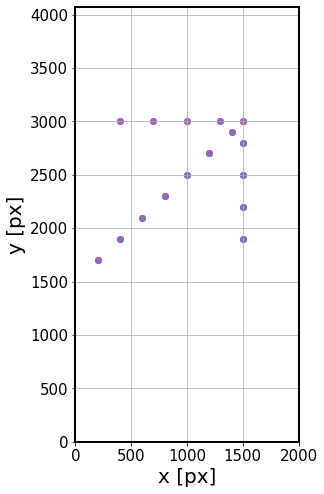

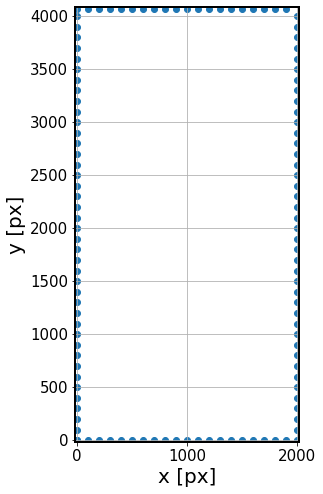

In [33]:
# Declare the SkySim()
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)

sensorName = ["R44_S00_C0", "R00_S22_C0",
              "R40_S02_C0", "R04_S20_C0",
              "R44_S00_C1", "R00_S22_C1",
              "R40_S02_C1", "R04_S20_C1",
             ]

# add arrows  per half-sensor 
xPx, yPx = pixel_arrow(x_vertex=1500, y_vertex=3000, width=1100, 
                spacing=300, diag_spacing=200, xmin=0, xmax=2000,
                ymin=0, ymax=4072, xy_offset=1300 )



store_x = []
store_y = []
store_sen = [] 
imType = []

starId = 0 
for sensor in sensorName:
    for i in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
        store_x.append(xPx[i])
        store_y.append(yPx[i])
        store_sen.append(sensor)
        imType.append('arrow')
        starId += 1 
        
# add outlines per half-sensor ... 
xPx, yPx = pixel_outline()
 
for sensor in sensorName:
    for i in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
        store_x.append(xPx[i])
        store_y.append(yPx[i])
        store_sen.append(sensor)
        imType.append('outline')
        starId += 1 
        
ra,dec = skySim.getRaDecInDeg()

coords_wfs = Table(data=[ra,dec, store_x,store_y, store_sen, imType], 
             names=['ra','dec', 'xPx', 'yPx', 'sensorName', 'imType']  )




Add arrows / outlines for ComCam ... 

[3500 3500 3500 3500 3500] [2000 2300 2600 2900 3200]
[2000 2300 2600 2900 3200] [3500 3500 3500 3500 3500]
y=1.00x 0.00
[1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000 3200 3400] [1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200.
 3400.]
[3500. 3500. 3500. 3500. 3500. 2000. 2300. 2600. 2900. 3200. 1000. 1200.
 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3500.] [2000. 2300. 2600. 2900. 3200. 3500. 3500. 3500. 3500. 3500. 1000. 1200.
 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3500.]


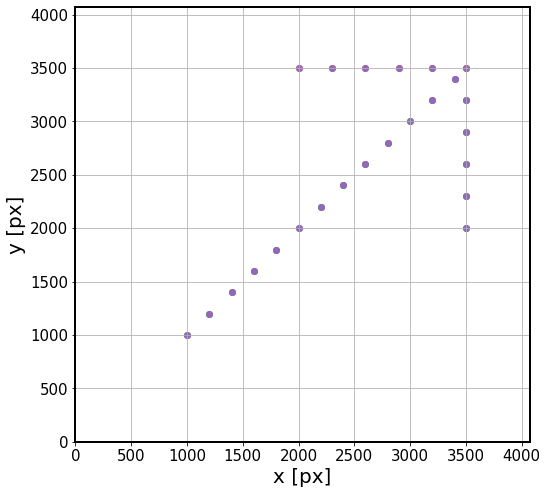

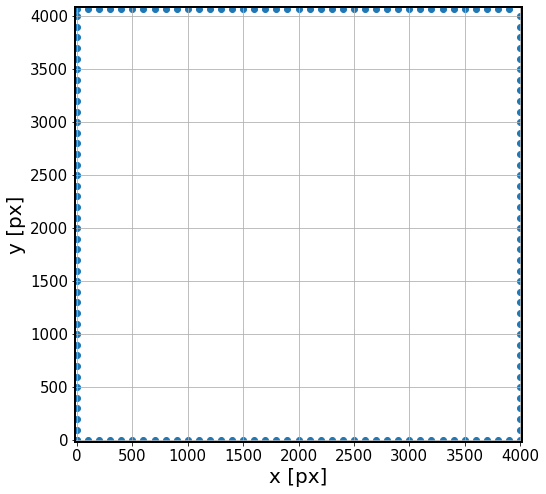

In [34]:
# Declare the SkySim()
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)

sensorName = ["R22_S00", "R22_S01","R22_S02",
              "R22_S10", "R22_S11","R22_S12",
              "R22_S20", "R22_S21","R22_S22"]

# add arrow per ComCam sensor (CCD)
xPx, yPx = pixel_arrow(x_vertex=3500, y_vertex=3500, width=1500, 
                spacing=300, diag_spacing=200, xmin=0, xmax=4072,
                ymin=0, ymax=4072, xy_offset=2500 )

store_x = []
store_y = []
store_sen = [] 
imType = []
starId = 0 
for sensor in sensorName:
    for i in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
        store_x.append(xPx[i])
        store_y.append(yPx[i])
        store_sen.append(sensor)
        imType.append('arrow')
        starId += 1 
        
# add outlines per comcam sensor ... 
xPx, yPx = pixel_outline(xmin=0,  xmax=4000, ymin=0, ymax=4072, dx=100 , dy=100, off = 15 )
 
for sensor in sensorName:
    for i in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
        store_x.append(xPx[i])
        store_y.append(yPx[i])
        store_sen.append(sensor)
        imType.append('outline')
        starId += 1 
        
ra,dec = skySim.getRaDecInDeg()

coords_com = Table(data=[ra,dec, store_x,store_y, store_sen, imType], 
             names=['ra','dec', 'xPx', 'yPx', 'sensorName', 'imType']  )


Also, add center of each corner assembly as the pointing for GAIA DR2 query : 

In [50]:
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)

sensorName = ["R44_S00_C0", "R00_S22_C0",
              "R40_S02_C0", "R04_S20_C0",
             ]

store_x = []
store_y = []
store_sen = [] 
imType = []

xPx = 2000
yPx = 2036  # 4072 / 2 

i = 0 
for sensor in sensorName:
    starId = i
    skySim.addStarByChipPos(sensor, starId, xPx,
                            yPx, starMag)
    store_x.append(xPx)
    store_y.append(yPx)
    store_sen.append(sensor)
    imType.append('center')
    i += 1 

ra,dec = skySim.getRaDecInDeg()

coords_cen = Table(data=[ra,dec, store_x,store_y, store_sen, imType], 
             names=['ra','dec', 'xPx', 'yPx', 'sensorName', 'imType']  )




Put these together and illustrate in (ra,deg) space : 

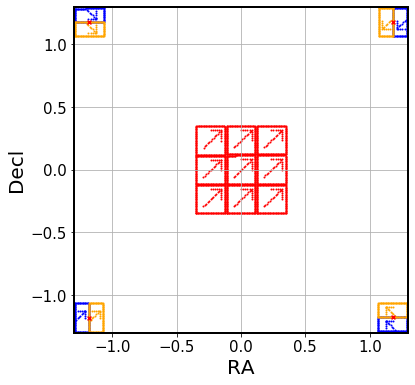

In [52]:
coords = vstack([coords_wfs, coords_com, coords_cen])

# shift from ra in  (0,360), which is the PhoSim format, 
# to ra in (-180,180), since we're centered on (0,0) 
m = coords['ra']>180
coords['ra'][m]  = coords['ra'][m]-360


fig,ax = plt.subplots(1,1,figsize=(6,6))
lim = 1.3 

# plot WFS 
for part,color in zip(['C0','C1'], ['blue','orange']):
    m = [s.endswith(part) for s in coords['sensorName']]
    ax.scatter(coords['ra'][m], coords['dec'][m],c=color,s=1)
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    
# plot ComCam 
color='red'
m = [s.startswith('R22') for s in coords['sensorName']]
ax.scatter(coords['ra'][m], coords['dec'][m], c=color, s=1)


# plot the center of each WFS corner, used to query GAIA DR2  
color='red'
m = [s.startswith('cen') for s in coords['imType']]
ax.scatter(coords['ra'][m], coords['dec'][m], c=color, s=15,
          marker='x')



ax.set_xlabel('RA')
ax.set_ylabel('Decl')

ax.grid()

plt.savefig('GAIA_arrows_outline.png', bbox_inches='tight', dpi=100)

So the ComCam sensors are oriented as I expected, but the WFS sensors are each having (x,y) start at a different rotation angle (i.e. as we go from 'R00_S22',  'R40_S02' , 'R44_S00', to 'R00_S22', the sensor coordinate system is re-oriented).  In the above, orange are the 'C1' , and blue the 'C0' half-sensors. 

In [53]:
sel = coords[coords['imType'] == 'center']
sel

ra,dec,xPx,yPx,sensorName,imType
float64,float64,float64,float64,str10,str7
1.1811817965673403,1.1785818078976729,2000.0,2036.0,R44_S00_C0,center
-1.1798258700895872,-1.178145473993399,2000.0,2036.0,R00_S22_C0,center
1.1767622392809642,-1.1746966484405015,2000.0,2036.0,R40_S02_C0,center
-1.176989741614534,1.174289071077627,2000.0,2036.0,R04_S20_C0,center


In [54]:
sel.write('GAIA_WFS_center_coords.txt', format='ascii')